In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('cls_train.csv')
test_df = pd.read_csv('cls_test.csv')

In [3]:
for i in range(len(train_df.columns)):
  if train_df[train_df.columns[i]].dtype != test_df[test_df.columns[i]].dtype:
    print(train_df.columns[i], 'train : ', train_df[train_df.columns[i]].dtype, 
          'test :', test_df[test_df.columns[i]].dtype)

OC train :  object test : float64
openDate train :  int64 test : float64
employee1 train :  float64 test : object
employee2 train :  float64 test : object


In [4]:
train_df.OC.value_counts()

open      286
 close     15
Name: OC, dtype: int64

In [5]:
train_df.OC = train_df.OC.astype(str).str.replace(' ','')

In [6]:
for i in range(len(test_df)):
  if len(str(test_df.openDate[i])) != 8:
    print(i, str(test_df.openDate[i]))

0 19981125.0
1 20160309.0
2 19890427.0
3 20100226.0
4 20040604.0
5 20081224.0
6 20020513.0
7 20070110.0
8 20151209.0
9 19851223.0
10 20071109.0
11 20080404.0
12 19820630.0
13 20080801.0
14 20030102.0
15 19950330.0
16 20080901.0
17 20070817.0
18 20000308.0
19 20130208.0
20 19970228.0
21 19990708.0
22 20060629.0
23 20160408.0
24 20000901.0
25 20051207.0
26 19940411.0
27 20140912.0
28 20061017.0
29 19760409.0
30 19971230.0
31 20080407.0
32 20001227.0
33 19880803.0
34 20070115.0
35 20121030.0
36 20110901.0
37 20070808.0
38 20091014.0
39 19880524.0
40 20081210.0
41 20060724.0
42 20130422.0
43 19930101.0
44 19820520.0
45 20110901.0
46 20090218.0
47 20141106.0
48 20111006.0
49 20081226.0
50 19830822.0
51 20060929.0
52 20050321.0
53 20081223.0
54 19990504.0
55 20061108.0
56 20121218.0
57 20051201.0
58 20120120.0
59 20131202.0
60 20150611.0
61 20030102.0
62 20100914.0
63 20150828.0
64 20051014.0
65 19960501.0
66 20121005.0
67 20140313.0
68 20150112.0
69 20060927.0
70 19960716.0
71 20170531.0
72

In [7]:
train_df.openDate = train_df.openDate.astype(float)

In [8]:
for i in range(len(test_df.employee1)):
  try:float(test_df.employee1[i])
  except:print(test_df.employee1[i])

1,637
1,816
1,065


In [9]:
for i in range(len(test_df.employee2)):
  try:float(test_df.employee2[i])
  except:print(test_df.employee2[i])

1,547
1,104
1,065


In [10]:
test_df.employee1 = test_df.employee1.astype(str).str.replace(',','').astype(float)
test_df.employee2 = test_df.employee2.astype(str).str.replace(',','').astype(float)

In [11]:
train_df.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228.0,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401.0,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228.0,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814.0,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901.0,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [12]:
test_df.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693.0,693.0,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379.0,371.0,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760.0,760.0,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437.0,385.0,same


In [13]:
print(len(train_df), len(test_df))

301 127


In [14]:
oc = train_df['OC']

In [15]:
train_df[train_df.columns.difference(['OC'])].dropna().reset_index()

,index,NCLiabilities1,NCLiabilities2,OnonCAsset1,OnonCAsset2,bedCount,ctax1,ctax2,debt1,debt2,...,sga1,sga2,sgg,shortLoan1,shortLoan2,sido,surplus1,surplus2,tanAsset1,tanAsset2
0,0,4.815023e+08,5.361169e+08,1.434496e+08,1.458986e+08,175.0,31641798.0,1.880807e+07,6.828260e+08,7.589937e+08,...,3.961135e+09,4.057422e+09,73,0.000000e+00,0.000000e+00,choongnam,1.496394e+09,1.271224e+09,2.360684e+09,2.386263e+09
1,2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,468.0,0.0,0.000000e+00,9.241434e+07,0.000000e+00,...,4.472197e+08,0.000000e+00,89,0.000000e+00,0.000000e+00,gyeonggi,0.000000e+00,0.000000e+00,1.204810e+08,0.000000e+00
2,3,1.437192e+10,2.073641e+10,3.945208e+09,3.915906e+09,353.0,173769780.0,2.188917e+08,4.236380e+10,3.775501e+10,...,7.067740e+10,6.492419e+10,141,1.988520e+10,9.219427e+09,incheon,8.643659e+09,7.740829e+09,3.832078e+10,3.485576e+10
3,4,2.098892e+10,2.136001e+10,2.223400e+08,7.893407e+08,196.0,0.0,0.000000e+00,4.989811e+10,5.143259e+10,...,4.765605e+10,4.712580e+10,32,1.793038e+10,1.759375e+10,gyeongnam,9.025550e+09,9.025550e+09,4.330613e+10,4.562945e+10
4,5,0.000000e+00,2.000000e+07,1.364582e+08,1.910460e+08,243.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,2.372791e+10,2.409622e+10,155,1.718053e+10,1.708714e+10,gyeongnam,3.664918e+09,5.879004e+09,1.849938e+10,2.186113e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,292,5.501736e+10,4.016982e+10,1.820000e+05,1.820000e+05,306.0,776907730.0,1.191116e+09,6.784385e+10,4.912228e+10,...,6.427413e+10,5.812107e+10,169,0.000000e+00,0.000000e+00,gyeonggi,4.915000e+08,4.915000e+08,7.711614e+10,4.024123e+10
273,293,2.036935e+09,1.969747e+09,5.471640e+07,4.251640e+07,109.0,0.0,0.000000e+00,4.942362e+09,5.062574e+09,...,3.455912e+09,3.214299e+09,170,0.000000e+00,0.000000e+00,gyeonggi,0.000000e+00,0.000000e+00,7.323860e+09,7.316858e+09
274,294,1.170000e+09,6.090000e+09,1.055250e+08,6.205000e+07,367.0,446810960.0,0.000000e+00,8.097221e+09,7.191291e+09,...,9.521440e+09,8.828640e+09,174,0.000000e+00,2.813239e+08,gyeongnam,0.000000e+00,0.000000e+00,1.409360e+10,1.286136e+10
275,295,3.520929e+09,3.233945e+09,0.000000e+00,0.000000e+00,0.0,50422230.0,5.147631e+07,4.478687e+09,3.945343e+09,...,4.883855e+09,4.936089e+09,177,0.000000e+00,0.000000e+00,gyeonggi,0.000000e+00,0.000000e+00,5.287754e+09,5.282917e+09


In [16]:
test_df[test_df.columns.difference(['OC'])].dropna().reset_index()

,index,NCLiabilities1,NCLiabilities2,OnonCAsset1,OnonCAsset2,bedCount,ctax1,ctax2,debt1,debt2,...,sga1,sga2,sgg,shortLoan1,shortLoan2,sido,surplus1,surplus2,tanAsset1,tanAsset2
0,0,1.343002e+10,4.720000e+09,7.463122e+08,796386240.0,300.0,76680000.0,218399804.0,6.769090e+10,5.540643e+10,...,6.565709e+10,6.261126e+10,139,3.805927e+10,3.714334e+10,incheon,8.944587e+09,8.944587e+09,4.629931e+10,4.356296e+10
1,1,2.415791e+10,2.521009e+10,4.500000e+06,14500000.0,44.0,0.0,0.0,6.626737e+10,6.730838e+10,...,3.259270e+10,3.868523e+10,149,2.330000e+10,2.420000e+10,jeju,1.046277e+10,0.000000e+00,6.678648e+10,6.545302e+10
2,3,2.876879e+09,2.558931e+09,0.000000e+00,0.0,363.0,0.0,0.0,2.891880e+10,1.211517e+10,...,0.000000e+00,0.000000e+00,71,1.875187e+10,4.251867e+09,busan,0.000000e+00,0.000000e+00,6.415297e+10,3.601937e+10
3,4,2.418283e+10,3.642417e+10,3.582019e+09,546748880.0,213.0,0.0,0.0,4.921637e+10,4.395973e+10,...,4.855803e+10,4.067810e+10,26,1.720219e+10,3.298427e+09,jeonbuk,1.492691e+10,1.507269e+10,6.024301e+10,6.014111e+10
4,5,1.641265e+10,2.070195e+10,4.281354e+08,242516000.0,220.0,271988090.0,224753012.0,4.487086e+10,4.545911e+10,...,2.926493e+10,2.865044e+10,122,1.650000e+10,1.755790e+10,gyeonggi,0.000000e+00,0.000000e+00,5.373652e+10,6.132813e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,116,3.250732e+09,3.150323e+09,3.803120e+07,48057200.0,170.0,60703130.0,73237127.0,4.041862e+09,3.859568e+09,...,6.393699e+09,6.199746e+09,155,0.000000e+00,0.000000e+00,gyeongnam,1.424647e+09,1.299147e+09,8.668758e+09,8.495282e+09
98,117,0.000000e+00,0.000000e+00,0.000000e+00,0.0,148.0,0.0,0.0,0.000000e+00,0.000000e+00,...,4.062433e+09,3.861626e+09,159,0.000000e+00,0.000000e+00,choongnam,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
99,118,0.000000e+00,0.000000e+00,2.000000e+07,20000000.0,149.0,5121384.0,2035530.0,4.604668e+08,4.400509e+08,...,1.544841e+09,1.244314e+09,159,0.000000e+00,0.000000e+00,choongnam,0.000000e+00,0.000000e+00,2.233149e+09,2.146794e+09
100,119,3.919771e+09,4.033884e+09,1.160000e+07,17450000.0,136.0,0.0,0.0,4.369718e+09,4.729688e+09,...,2.657350e+09,1.768654e+09,165,0.000000e+00,0.000000e+00,choongbuk,0.000000e+00,0.000000e+00,6.798386e+09,6.253089e+09


##### Train : 301 -> 277
##### Test : 127 -> 102

In [17]:
train_df = train_df[train_df.columns.difference(['OC'])].dropna().reset_index()
train_df['OC'] = oc
test_df = test_df[test_df.columns.difference(['OC'])].dropna().reset_index()
test_df['OC'] = np.nan

## Encoding

In [18]:
train_df.select_dtypes(include = ['object']).columns

Index(['instkind', 'ownerChange', 'sido', 'OC'], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoded_x = None
for i in train_df.select_dtypes(include = ['object']).columns:
  le = LabelEncoder()
  if i == 'OC':
    train_df.OC = le.fit_transform(train_df.OC)
  else:
    feature = le.fit_transform(train_df[i])
    feature = feature.reshape(train_df.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
      encoded_x = pd.DataFrame(feature)
    else:
      encoded_x = pd.concat((encoded_x, pd.DataFrame(feature)), axis=1)



In [20]:
encoded_x

,0,1,2,3,4,5,6,0,1,0,...,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
275,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
col = []
for i in range(3):
  col.extend(train_df[train_df.select_dtypes(
      include = ['object']).columns].iloc[:,i].unique())

In [22]:
encoded_x.columns = col
encoded_x

,nursing_hospital,general_hospital,hospital,traditional_clinic,clinic,dental_clinic,traditional_hospital,same,change,choongnam,...,seoul,jeonbuk,choongbuk,ulsan,daejeon,daegu,gyeongbuk,gangwon,gwangju,sejong
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
275,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
final_train = pd.concat((train_df.drop(columns = train_df.select_dtypes(
    include = ['object']).columns), encoded_x), axis = 1).iloc[:,1:]

In [24]:
final_train

,NCLiabilities1,NCLiabilities2,OnonCAsset1,OnonCAsset2,bedCount,ctax1,ctax2,debt1,debt2,employee1,...,seoul,jeonbuk,choongbuk,ulsan,daejeon,daegu,gyeongbuk,gangwon,gwangju,sejong
0,4.815023e+08,5.361169e+08,1.434496e+08,1.458986e+08,175.0,31641798.0,1.880807e+07,6.828260e+08,7.589937e+08,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,468.0,0.0,0.000000e+00,9.241434e+07,0.000000e+00,234.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.437192e+10,2.073641e+10,3.945208e+09,3.915906e+09,353.0,173769780.0,2.188917e+08,4.236380e+10,3.775501e+10,663.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2.098892e+10,2.136001e+10,2.223400e+08,7.893407e+08,196.0,0.0,0.000000e+00,4.989811e+10,5.143259e+10,206.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000e+00,2.000000e+07,1.364582e+08,1.910460e+08,243.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,397.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,5.501736e+10,4.016982e+10,1.820000e+05,1.820000e+05,306.0,776907730.0,1.191116e+09,6.784385e+10,4.912228e+10,807.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,2.036935e+09,1.969747e+09,5.471640e+07,4.251640e+07,109.0,0.0,0.000000e+00,4.942362e+09,5.062574e+09,75.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,1.170000e+09,6.090000e+09,1.055250e+08,6.205000e+07,367.0,446810960.0,0.000000e+00,8.097221e+09,7.191291e+09,180.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
275,3.520929e+09,3.233945e+09,0.000000e+00,0.000000e+00,0.0,50422230.0,5.147631e+07,4.478687e+09,3.945343e+09,62.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
test_df.select_dtypes(include = ['object']).columns

Index(['instkind', 'ownerChange', 'sido'], dtype='object')

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoded_x = None
for i in test_df.select_dtypes(include = ['object']).columns:
  le = LabelEncoder()
  if i == 'OC':
    train_df.OC = le.fit_transform(test_df.OC)
  else:
    feature = le.fit_transform(test_df[i])
    feature = feature.reshape(test_df.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
      encoded_x = pd.DataFrame(feature)
    else:
      encoded_x = pd.concat((encoded_x, pd.DataFrame(feature)), axis=1)



In [27]:
encoded_x

,0,1,2,3,0,1,0,1,2,3,...,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
col = []
for i in range(3):
  col.extend(test_df[test_df.select_dtypes(
      include = ['object']).columns].iloc[:,i].unique())

In [29]:
encoded_x.columns = col
final_test = pd.concat((test_df.drop(columns = test_df.select_dtypes(
    include = ['object']).columns), encoded_x), axis = 1).iloc[:,1:]

In [30]:
final_test

,NCLiabilities1,NCLiabilities2,OnonCAsset1,OnonCAsset2,bedCount,ctax1,ctax2,debt1,debt2,employee1,...,gyeongbuk,jeonnam,daejeon,seoul,choongbuk,daegu,ulsan,gyeongnam,choongnam,sejong
0,1.343002e+10,4.720000e+09,7.463122e+08,796386240.0,300.0,76680000.0,218399804.0,6.769090e+10,5.540643e+10,693.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.415791e+10,2.521009e+10,4.500000e+06,14500000.0,44.0,0.0,0.0,6.626737e+10,6.730838e+10,379.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.876879e+09,2.558931e+09,0.000000e+00,0.0,363.0,0.0,0.0,2.891880e+10,1.211517e+10,760.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.418283e+10,3.642417e+10,3.582019e+09,546748880.0,213.0,0.0,0.0,4.921637e+10,4.395973e+10,437.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.641265e+10,2.070195e+10,4.281354e+08,242516000.0,220.0,271988090.0,224753012.0,4.487086e+10,4.545911e+10,386.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.250732e+09,3.150323e+09,3.803120e+07,48057200.0,170.0,60703130.0,73237127.0,4.041862e+09,3.859568e+09,104.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.000000e+00,0.000000e+00,0.000000e+00,0.0,148.0,0.0,0.0,0.000000e+00,0.000000e+00,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.000000e+00,0.000000e+00,2.000000e+07,20000000.0,149.0,5121384.0,2035530.0,4.604668e+08,4.400509e+08,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,3.919771e+09,4.033884e+09,1.160000e+07,17450000.0,136.0,0.0,0.0,4.369718e+09,4.729688e+09,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
li = []
for i in final_test.columns:
    if i not in final_train.columns:
        li.append(i)
        da = final_test[li]
        final_test = pd.concat((final_test.drop(li, axis = 1), da), axis = 1)
        final_train[li] = 0.0
li = []
for i in final_train.columns:
    if i not in final_test.columns:
        li.append(i)
        da = final_train[li]
        final_train = pd.concat((final_train.drop(li, axis = 1), da), axis = 1)
        final_test[li] = 0.0

In [32]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

In [33]:
train_y, train_x = final_train['OC'], final_train[final_train.columns.difference(['OC'])]
test_y, test_x = final_test['OC'], final_test[final_test.columns.difference(['OC'])]

In [34]:
print(train_x.shape, test_x.shape)

(277, 80) (102, 80)


In [35]:
train_x

,NCLiabilities1,NCLiabilities2,OnonCAsset1,OnonCAsset2,bedCount,busan,change,choongbuk,choongnam,clinic,...,sgg,shortLoan1,shortLoan2,surplus1,surplus2,tanAsset1,tanAsset2,traditional_clinic,traditional_hospital,ulsan
0,4.815023e+08,5.361169e+08,1.434496e+08,1.458986e+08,175.0,0.0,1.0,0.0,0.0,1.0,...,73,0.000000e+00,0.000000e+00,1.496394e+09,1.271224e+09,2.360684e+09,2.386263e+09,0.0,0.0,0.0
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,468.0,0.0,1.0,1.0,0.0,1.0,...,89,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.204810e+08,0.000000e+00,0.0,0.0,0.0
2,1.437192e+10,2.073641e+10,3.945208e+09,3.915906e+09,353.0,0.0,1.0,0.0,0.0,0.0,...,141,1.988520e+10,9.219427e+09,8.643659e+09,7.740829e+09,3.832078e+10,3.485576e+10,0.0,0.0,0.0
3,2.098892e+10,2.136001e+10,2.223400e+08,7.893407e+08,196.0,0.0,1.0,0.0,0.0,0.0,...,32,1.793038e+10,1.759375e+10,9.025550e+09,9.025550e+09,4.330613e+10,4.562945e+10,0.0,0.0,1.0
4,0.000000e+00,2.000000e+07,1.364582e+08,1.910460e+08,243.0,0.0,1.0,0.0,0.0,0.0,...,155,1.718053e+10,1.708714e+10,3.664918e+09,5.879004e+09,1.849938e+10,2.186113e+10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,5.501736e+10,4.016982e+10,1.820000e+05,1.820000e+05,306.0,0.0,1.0,1.0,0.0,0.0,...,169,0.000000e+00,0.000000e+00,4.915000e+08,4.915000e+08,7.711614e+10,4.024123e+10,0.0,0.0,0.0
273,2.036935e+09,1.969747e+09,5.471640e+07,4.251640e+07,109.0,0.0,1.0,1.0,0.0,0.0,...,170,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.323860e+09,7.316858e+09,1.0,0.0,0.0
274,1.170000e+09,6.090000e+09,1.055250e+08,6.205000e+07,367.0,0.0,1.0,0.0,0.0,1.0,...,174,0.000000e+00,2.813239e+08,0.000000e+00,0.000000e+00,1.409360e+10,1.286136e+10,0.0,0.0,1.0
275,3.520929e+09,3.233945e+09,0.000000e+00,0.000000e+00,0.0,0.0,1.0,1.0,0.0,1.0,...,177,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.287754e+09,5.282917e+09,0.0,0.0,0.0


### Without GridSearchCV

In [36]:
svc_errors = []
ada_errors = []
bag_errors = []
rfc_errors = []
vc_errors = []
xgb_errors = []

In [37]:
skf = StratifiedKFold(n_splits=10)

In [38]:
for train_idx, valid_idx in skf.split(train_x, train_y):
    tra, val = train_x.iloc[train_idx], train_x.iloc[valid_idx]
    target_tra, target_val = list(train_y.iloc[train_idx]), list(train_y.iloc[valid_idx])

    #SVC
    svc = SVC(probability=True)
    svc.fit(tra, target_tra)
    pred = svc.predict(val)
    error = mean_squared_error(target_val, pred)
    svc_errors.append(error)
    
    #AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(tra, target_tra)
    pred = ada.predict(val)
    error = mean_squared_error(target_val, pred)
    ada_errors.append(error)
    
    #BaggingClassifier
    bag = BaggingClassifier()
    bag.fit(tra, target_tra)
    pred = bag.predict(val)
    error = mean_squared_error(target_val, pred)
    bag_errors.append(error)
    
    #RandomForestClassifier
    rfc = RandomForestClassifier()
    rfc.fit(tra, target_tra)
    pred = rfc.predict(val)
    error = mean_squared_error(target_val, pred)
    rfc_errors.append(error)
    

    
    #XGBoostClassifier
    xgb = XGBClassifier()
    xgb.fit(tra, target_tra)
    pred = xgb.predict(val)
    error = mean_squared_error(target_val, pred)
    xgb_errors.append(error)
    
    #VotingClassifier
    vc = VotingClassifier(estimators=[('svc',svc), ('ada',ada), ('bag',bag), ('rfc',rfc), ('xgb',xgb)], voting = 'soft')
    vc.fit(tra, target_tra)
    pred = vc.predict(val)
    error = mean_squared_error(target_val, pred)
    vc_errors.append(error)

In [39]:
ada_final_error = sum(ada_errors) / len(ada_errors)
print('AdaBoost FINAL MSE: %.3f' % (ada_final_error))

svc_final_error = sum(svc_errors) / len(svc_errors)
print('SVC FINAL MSE: %.3f' % (svc_final_error))

rfc_final_error = sum(rfc_errors) / len(rfc_errors)
print('RANDOM FOREST FINAL MES: %.3f' % (rfc_final_error))

bag_final_error = sum(bag_errors) / len(bag_errors)
print('Bagging FINAL MSE: %.3f' % (bag_final_error))

xgb_final_error = sum(xgb_errors) / len(xgb_errors)
print('XGBoost FINAL MSE: %.3f' % (xgb_final_error))

vc_final_error = sum(vc_errors) / len(vc_errors)
print('Voting FINAL MES: %.3f' % (vc_final_error))

AdaBoost FINAL MSE: 0.047
SVC FINAL MSE: 0.040
RANDOM FOREST FINAL MES: 0.040
Bagging FINAL MSE: 0.047
XGBoost FINAL MSE: 0.040
Voting FINAL MES: 0.040


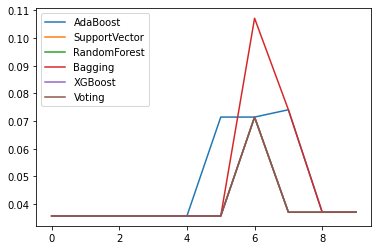

In [40]:
plt.plot(range(len(ada_errors)),ada_errors, label = 'AdaBoost')
plt.plot(range(len(svc_errors)),svc_errors, label = 'SupportVector')
plt.plot(range(len(rfc_errors)),rfc_errors, label = 'RandomForest')
plt.plot(range(len(bag_errors)),bag_errors, label = 'Bagging')
plt.plot(range(len(xgb_errors)),xgb_errors, label = 'XGBoost')
plt.plot(range(len(vc_errors)),vc_errors, label = 'Voting')
plt.legend(loc='best')

In [ ]:
plot_importance(xgb)
plt.show()

In [ ]:
#SVC
svc = SVC(probability=True)
svc.fit(train_x, train_y)
pred = svc.predict_proba(test_x)
df_svc = pred

#AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(train_x, train_y)
pred = ada.predict_proba(test_x)
df_ada = pred

#BaggingClassifier
bag = BaggingClassifier()
bag.fit(train_x, train_y)
pred = bag.predict_proba(test_x)
df_bag = pred

#RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
pred = rfc.predict_proba(test_x)
df_rfc = pred

#XGBoostClassifier
xgb = XGBClassifier()
xgb.fit(train_x, train_y)
pred = xgb.predict_proba(test_x)
df_xgb = pred

#VotingClassifier
vc = VotingClassifier(estimators=[('svc',svc), ('ada',ada), ('bag',bag), ('rfc',rfc), ('xgb',xgb)], voting = 'soft')
vc.fit(train_x, train_y)
pred = vc.predict_proba(test_x)
df_vc = pred

In [ ]:
ensemble = pd.DataFrame()

In [ ]:
ensemble['ada'] = pd.Series(df_ada[:,1])
ensemble['svc'] = pd.Series(df_svc[:,1])
ensemble['bag'] = pd.Series(df_bag[:,1])
ensemble['rfc'] = pd.Series(df_rfc[:,1])
ensemble['xgb'] = pd.Series(df_xgb[:,1])
ensemble['vc'] = pd.Series(df_vc[:,1])
ensemble['ens'] =( ensemble['ada'] + ensemble['svc'] +ensemble['bag']+ ensemble['rfc'] + ensemble['xgb'] + ensemble['vc'])/6 

In [ ]:
ensemble.describe()

In [ ]:
ensemble['OC'] = (ensemble['ens'] >= 0.9).astype('int')

In [ ]:
ensemble

### With GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

#### RandomForest

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

In [ ]:
rf = RandomForestClassifier()
kf = KFold(random_state = 0,
          n_splits = 10,
          shuffle = True)

In [ ]:
rf_grid_search = GridSearchCV(estimator = rf,
                          param_grid = rf_param_grid,
                          cv = kf,
                          n_jobs = -1,
                          verbose = 2)

In [ ]:
rf_grid_search.fit(train_x, train_y)

In [ ]:
rf_grid_search.best_params_

#### SVC

In [ ]:
svc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

In [ ]:
svc = SVC(probability=True)

In [ ]:
svc_grid_search = GridSearchCV(estimator=svc,
                              param_grid=svc_param_grid,
                              cv = kf,
                              n_jobs = -1,
                              verbose = 2)

In [ ]:
svc_grid_search.fit(train_x, train_y)

In [ ]:
svc_grid_search.best_params_

#### AdaBoost

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state = 0, max_features = "auto", class_weight = "auto", max_depth = None)

In [ ]:
ada_param_grid = {
    'base_estimator': [None, dtc],
    'n_estimators':[10, 50, 100, 200]
}

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
ada_grid_search = GridSearchCV(ada, ada_param_grid, cv = kf, n_jobs = -1, verbose = 2)

In [ ]:
ada_grid_search.fit(train_x, train_y)

In [ ]:
ada_grid_search.best_params_

#### Bagging

In [ ]:
bag_param_grid = {
    'base_estimator':[None, dtc],
    'n_estimators':[10, 50, 100, 200]
}

In [ ]:
bag = BaggingClassifier()

In [ ]:
bag_grid_search = GridSearchCV(bag, bag_param_grid, cv = kf, n_jobs = -1, verbose = 2)

In [ ]:
bag_grid_search.fit(train_x, train_y)

In [ ]:
bag_grid_search.best_params_

#### XGBoost

In [ ]:
xgb_param_grid ={
    'max_depth' : [3,4,5,6] , 
    'n_estimators': [10, 50, 100, 200], 
    'learning_rate':[0.01, 0.05, 0.1], 
    'gamma': [0.5, 1, 2]
}

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv = kf, n_jobs = -1, verbose = 2)

In [ ]:
xgb_grid_search.fit(train_x, train_y)

In [ ]:
xgb_grid_search.best_params_

In [ ]:
n_estimators 파라미터는 반복 수행하는 트리의 개수
max_features, - 최적의 분할을 위해 고려할 최대 feature 개수

In [ ]:
xgb_grid_search.best_estimator_

In [ ]:
#SVC
pred = svc_grid_search.best_estimator_.predict_proba(test_x)
df_svc = pred

#AdaBoostClassifier
pred = ada_grid_search.best_estimator_.predict_proba(test_x)
df_ada = pred

#BaggingClassifier
pred = bag_grid_search.best_estimator_.predict_proba(test_x)
df_bag = pred

#RandomForestClassifier
pred = rf_grid_search.best_estimator_.predict_proba(test_x)
df_rfc = pred

#XGBoostClassifier
pred = xgb_grid_search.best_estimator_.predict_proba(test_x)
df_xgb = pred

#VotingClassifier
vc = VotingClassifier(estimators=[('svc',svc_grid_search.best_estimator_), ('ada',ada_grid_search.best_estimator_), ('bag',bag_grid_search.best_estimator_),
                                  ('rfc',rf_grid_search.best_estimator_), ('xgb',xgb_grid_search.best_estimator_)], voting = 'soft')
vc.fit(train_x, train_y)
pred = vc.predict_proba(test_x)
df_vc = pred

In [ ]:
ensemble_grid = pd.DataFrame()

In [ ]:
ensemble_grid['ada'] = pd.Series(df_ada[:,1])
ensemble_grid['svc'] = pd.Series(df_svc[:,1])
ensemble_grid['bag'] = pd.Series(df_bag[:,1])
ensemble_grid['rfc'] = pd.Series(df_rfc[:,1])
ensemble_grid['xgb'] = pd.Series(df_xgb[:,1])
ensemble_grid['vc'] = pd.Series(df_vc[:,1])
ensemble_grid['ens'] =( ensemble_grid['ada'] + ensemble_grid['svc'] +ensemble_grid['bag']+ ensemble_grid['rfc'] + ensemble_grid['xgb'] + ensemble_grid['vc'])/6 

In [ ]:
ensemble_grid

In [ ]:
ensemble_grid.describe()

In [ ]:
ensemble_grid['OC'] = (ensemble_grid['ens'] >= 0.85).astype('int')

In [ ]:
ensemble_grid